In [682]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random 
import time

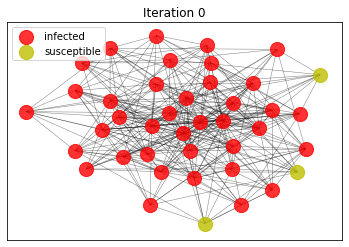

In [683]:
G= nx.barabasi_albert_graph(41,10) 
pos=nx.spring_layout(G) 
fig, ax = plt.subplots()
plt.title('Iteration 0')
nx.draw_networkx_nodes(G,pos,
                       nodelist=list(np.arange(0,38,1)),
                       node_color='r',
                       node_size=200,
                   alpha=0.8,label='infected')
nx.draw_networkx_nodes(G,pos,
                       nodelist=[38,39,40],
                       node_color='y',
                       node_size=200,
                   alpha=0.8,label='susceptible')

nx.draw_networkx_edges(G,pos,width=0.5,alpha=0.5)

ax.legend()

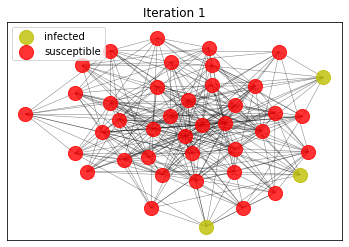

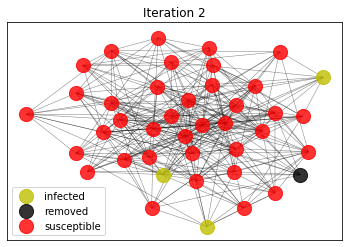

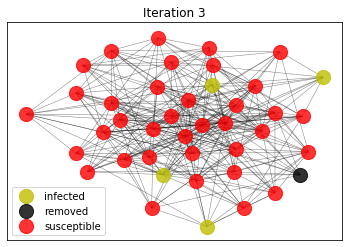

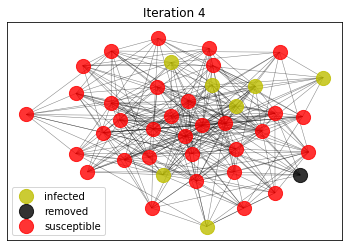

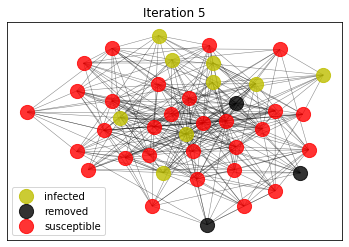

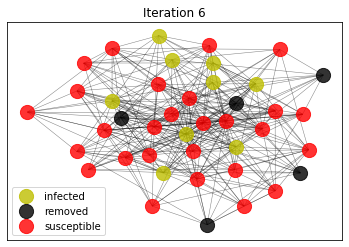

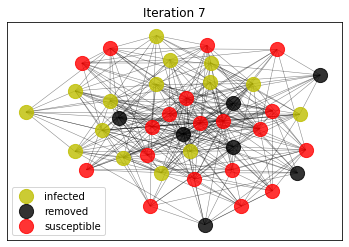

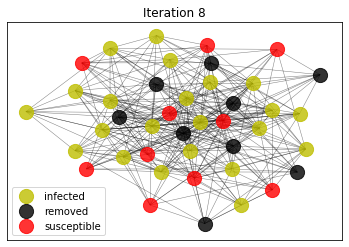

In [684]:
infected=[38,39,40]
suscep=list(np.arange(0,38,1))
removed=[]
iteration = 8
counter = 0
a = 0.3     # Initial Condition: a=0.2  b=0.1 dt=1
b = 0.1
I = 3
N = 41
S = 38
R = 0
dt = 1

while counter<iteration:
    
    p_infection= (a*I/N)*dt
    p_recover = b*dt
    new_infected = []
    new_removed = []
    
    for inf in infected:
        nei = set(G[inf].keys()).intersection(suscep)
        num_infected = np.random.binomial(len(nei),p_infection)
        temp_inf = random.sample(nei,num_infected)
        new_infected.extend(temp_inf)
                                       
    new_infected= list(dict.fromkeys(new_infected))
    
    num_removed = np.random.binomial(len(infected),p_recover)
    temp_re = random.sample(infected,num_removed)
    new_removed.extend(temp_re)
    new_removed=list(dict.fromkeys(new_removed))
    
    
    for re in new_removed:
        infected.remove(re)
        
    for inf in new_infected:
        suscep.remove(inf)
        
    infected.extend(new_infected)
    removed.extend(new_removed)
    counter = counter + 1
    
    S = S - len(new_infected)
    R = R + len(new_removed)
    I = N - S - R
    
    
    fig, ax = plt.subplots()                               
    plt.title('Iteration {}'.format(counter))
    nx.draw_networkx_nodes(G,pos,
                       nodelist=infected,
                       node_color='y',
                       node_size=200,
                   alpha=0.8,label='infected')
    
    nx.draw_networkx_nodes(G,pos,
                       nodelist=removed,
                       node_color='k',
                       node_size=200,
                   alpha=0.8,label='removed')
    
    nx.draw_networkx_nodes(G,pos,
                       nodelist=suscep,
                       node_color='r',
                       node_size=200,
                   alpha=0.8,label='susceptible')
    
    nx.draw_networkx_edges(G,pos,width=0.5,alpha=0.5)
    
    ax.legend()
    plt.show()
    plt.pause(0.5)



    